## Librairies

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Input

In [2]:
L = 20
h = 2.06
l = 2.11

In [3]:
in_df = pd.read_csv('Data/input.csv', sep = ';')
in_df = in_df.set_index('Material')
#in_df.index = in_df.Material.values

## Support Function

In [4]:
def getMeYoung(file_path, L,h,l):

    ### Data Loading & Preparation
    a = pd.read_csv(file_path, sep = '\t')
    X = a.loc[1:] # first line is empty
    X.columns = ['Force', 'Deformation']

    ### Cleaning in order to proper filter on the Deformation [0.01, 0.1]
    ix = (X.loc[:, 'Deformation'] > 0.01) & (X.loc[:, 'Deformation'] < 0.1 )
    X = X.loc[ix]

    try:
        ### Compute Slope
        slope, _, _, _, _ = scipy.stats.linregress(X.loc[:, 'Deformation'], X.loc[:, 'Force'])

        ### Compute Young Module
        E = L**3 * slope / (4 * l * h**3) / 1000
    except:
        E = None

    return E

## Make the loop

In [6]:
YM = []
Material = []
XP = []

path = 'Data/ech_de_adri'

for d in os.listdir(path): ## Loop on the directories
    if d != '.DS_Store':
        for f in os.listdir(path + '/' + d):
            f_path = path + '/' + d + '/' + f
            ## Compute the Young Module
            YM.append(getMeYoung(f_path,L,h,l))
            
            ## Update the Material
            Material.append(d)
            
            ## Update of the experimentator
            XP.append('Adri')
            
            
path = 'Data/ech_de_ali'
for d in os.listdir(path): ## Loop on the directories
    if d != '.DS_Store':
        for f in os.listdir(path + '/' + d):
            f_path = path + '/' + d + '/' + f
            ## Compute the Young Module
            YM.append(getMeYoung(f_path,L,h,l))
            
            ## Update the Material
            Material.append(d)
            
            ## Update of the experimentator
            XP.append('Ali')

## Final Res

In [7]:
final_res = pd.DataFrame()

In [8]:
final_res.loc[:, 'Material']       = Material
final_res.loc[:, 'Experimentator'] = XP
final_res.loc[:, 'Young Module']   = YM

In [9]:
final_res.to_csv('final_res.csv', index = False, sep = ';')

In [10]:
final_res

,Material,Experimentator,Young Module
0,3M ESPE Filtek Supreme XTE,Adri,6.288089
1,3M ESPE Filtek Supreme XTE,Adri,6.016479
2,3M ESPE Filtek Supreme XTE,Adri,7.877887
3,3M ESPE Filtek Supreme XTE,Adri,6.532020
4,3M ESPE Filtek Supreme XTE,Adri,5.904751
5,3M ESPE Filtek Supreme XTE,Adri,6.324866
6,3M ESPE Filtek Supreme XTE,Adri,5.440426
7,3M ESPE Filtek Supreme XTE,Adri,8.302014
8,3M ESPE Filtek Supreme XTE,Adri,6.982858
9,3M ESPE Filtek Supreme XTE,Adri,7.570711


## Make a graph

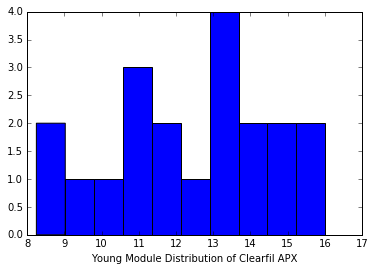

In [11]:
ix = final_res.loc[:, 'Material'] == 'Clearfil APX'

plt.hist(final_res.loc[ix, 'Young Module'])
plt.xlabel('Young Module Distribution of Clearfil APX')
plt.show()
plt.savefig('Clearfill APX.png')